In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Perceptron

![](./image/week1_perceptron.png)

### Load Dataset

In [2]:
data = pd.read_csv('./data/data_banknote_authentication.csv', names = ['X1', 'X2', 'X3', 'X4', 'Y'])

In [3]:
data

,X1,X2,X3,X4,Y
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Activation Function (Step Function)

<img src="./image/week1_stepfunction.svg.png" width="200" height="200"/>

In [4]:
def step_function(x):
    return (x >= 0) * 1

## Train Perceptron with only one sample

In [5]:
# 가중치 & 편향 1로 초기화
weight = np.ones(4) # [1, 1, 1, 1]
bias = 1
# 학습 데이터 정의
X = data.iloc[0, 0:4].values # DataFrame.values => df와 차원이 동일한 numpy.array 반환
# 합성곱 계산
weight_sum = X.dot(weight) + bias # numpy.array.dot(nunmpy.array) -> 행렬곱
# 활성화함수(계단함수) 통과
output = step_function(weight_sum)
# 실제값 정의
y = data.iloc[0, 4]

print("가중치:", weight, "편향:", bias)
print("data:", X)
print("가중합:", np.array(X).dot(weight))
print("출력:", output, "실제 값:", y)

가중치: [1. 1. 1. 1.] 편향: 1
data: [ 3.6216   8.6661  -2.8073  -0.44699]
가중합: 9.03341
출력: 1 실제 값: 0


![](./image/week1_perceptron_algorithm.png)

In [6]:
lr = 0.01 # learning rate (학습률)
for i in range(4):
    weight[i] = weight[i] + lr * (y - output)*X[i]
bias = bias  + lr * (y - output)
output = step_function(X.dot(weight) + bias)

print("가중치:", weight, "편향:", bias, "출력:", output)

가중치: [0.963784  0.913339  1.028073  1.0044699] 편향: 0.99 출력: 1


In [7]:
epoch = 10
for j in range(epoch):
    for i in range(4):
        weight[i] = weight[i] + lr * (y - output)*X[i]
    bias = bias  + lr * (y - output)
    output = step_function(X.dot(weight) + bias)

    print("[Epoch]", j, "가중치:", weight, "편향:", bias, "출력:", output)

[Epoch] 0 가중치: [0.927568  0.826678  1.056146  1.0089398] 편향: 0.98 출력: 1
[Epoch] 1 가중치: [0.891352  0.740017  1.084219  1.0134097] 편향: 0.97 출력: 1
[Epoch] 2 가중치: [0.855136  0.653356  1.112292  1.0178796] 편향: 0.96 출력: 1
[Epoch] 3 가중치: [0.81892   0.566695  1.140365  1.0223495] 편향: 0.95 출력: 1
[Epoch] 4 가중치: [0.782704  0.480034  1.168438  1.0268194] 편향: 0.94 출력: 1
[Epoch] 5 가중치: [0.746488  0.393373  1.196511  1.0312893] 편향: 0.9299999999999999 출력: 1
[Epoch] 6 가중치: [0.710272  0.306712  1.224584  1.0357592] 편향: 0.9199999999999999 출력: 1
[Epoch] 7 가중치: [0.674056  0.220051  1.252657  1.0402291] 편향: 0.9099999999999999 출력: 1
[Epoch] 8 가중치: [0.63784  0.13339  1.28073  1.044699] 편향: 0.8999999999999999 출력: 1
[Epoch] 9 가중치: [0.601624  0.046729  1.308803  1.0491689] 편향: 0.8899999999999999 출력: 0


## Train Perceptron with all samples

### Split Train & Test Dataset

In [8]:
# random하게 train 인덱스를 뽑고 나머지를 test 인덱스로 지정
train_idx = np.random.choice(data.shape[0], 1000, replace = False)
test_idx = np.setdiff1d(range(data.shape[0]), train_idx)

train = data.iloc[train_idx, :]
test = data.iloc[test_idx, :]
print(train.shape, test.shape)

(1000, 5) (372, 5)


In [9]:
weight = np.ones(5) #bias를 weight에 포함시킴  [ 1, 1, 1, 1, 1]
X = train.iloc[:, 0:4].values
y = train.iloc[:, 4].values # df -> numpy
ones_vector = np.ones((X.shape[0], 1))
design_X = np.hstack((ones_vector, X))

In [10]:
print(design_X)

[[ 1.        0.77805   6.6424   -1.1425   -1.0573  ]
 [ 1.        2.4391    6.4417   -0.80743  -0.69139 ]
 [ 1.        4.1711    8.722    -3.0224   -0.59699 ]
 ...
 [ 1.        0.72252  -0.053811  5.6703   -1.3509  ]
 [ 1.       -0.8471    3.1329   -3.0112   -2.9388  ]
 [ 1.       -2.3629   -0.10554   1.9336    1.1358  ]]


In [11]:
print(y)

[0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0
 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1
 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1
 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 0 1 1 0 0 0 0 1 0 

In [12]:
weight_sum = design_X.dot(weight)
output = step_function(weight_sum)

epoch = 10
for j in range(epoch):
    weight = weight + lr * (y - output).dot(design_X)
    output = step_function(design_X.dot(weight) + bias)
    
    accuracy = 1 - sum(abs(y-output))/1000
    
    print("[Epoch]", j+1, "Train 정확도:", accuracy)

[Epoch] 1 Train 정확도: 0.7050000000000001
[Epoch] 2 Train 정확도: 0.902
[Epoch] 3 Train 정확도: 0.946
[Epoch] 4 Train 정확도: 0.956
[Epoch] 5 Train 정확도: 0.957
[Epoch] 6 Train 정확도: 0.962
[Epoch] 7 Train 정확도: 0.964
[Epoch] 8 Train 정확도: 0.968
[Epoch] 9 Train 정확도: 0.963
[Epoch] 10 Train 정확도: 0.972


In [13]:
test_X = test.iloc[:, 0:4].values
test_y = test.iloc[:, 4].values
ones_vector = np.ones((test_X.shape[0], 1))
design_X = np.hstack((ones_vector, test_X))

weight_sum = design_X.dot(weight)
output = step_function(weight_sum)

test_accuracy = 1 - sum(abs(test_y-output))/1000
test_accuracy

0.982

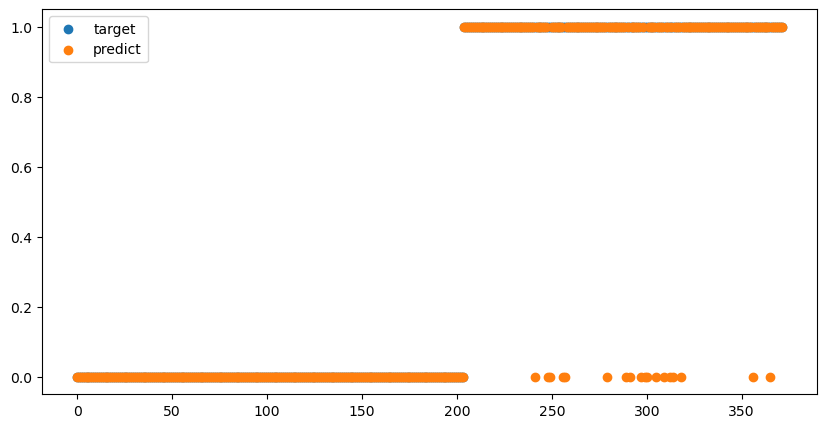

In [14]:
data_idx = [i for i in range(test_y.shape[0])]
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(data_idx, test_y, label = 'target')
ax.scatter(data_idx, output, label = 'predict')
ax.legend()

# XOR problem

In [15]:
import torch
import torch.nn as nn

In [16]:
# gpu가 있다면 gpu를 사용할 준비
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cpu


<img src="./image/week1_xor_graph.png" height="200"/>

In [19]:
# x,y생성
# 각 텐서에는 데이터의 값 이외에도 미분값 또한 저장된다.
x = torch.Tensor([[0,0],[0,1],[1,0],[1,1]]).to(DEVICE)
y = torch.Tensor([[0],[1],[1],[0]]).to(DEVICE)

In [20]:
perceptron = nn.Sequential(
    nn.Linear(2, 1, bias = True),
    nn.Sigmoid()
)

In [21]:
y_pred = perceptron(x)
res = (y_pred > 0.5).float()
res

tensor([[0.],
        [0.],
        [0.],
        [0.]])

In [22]:
lr = 1e-3
loss_func = torch.nn.BCELoss().to(DEVICE)
optim = torch.optim.Adam(perceptron.parameters(), lr = lr)

In [23]:
for epoch in range(10000):
  optim.zero_grad()
  y_pred = perceptron(x)

  loss = loss_func(y_pred, y)
  loss.backward()
  optim.step() # ?????찾아보고 말해주기

  if epoch % 1000 == 0 :
    print(epoch, loss.item())

0 0.7524031400680542
1000 0.6939818263053894
2000 0.6931805610656738
3000 0.6931473016738892
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996


In [24]:
y_pred = perceptron(x)
res = (y_pred>0.5).float()
res

tensor([[0.],
        [0.],
        [0.],
        [0.]])

In [25]:
#layer 쌓는 방식
model = nn.Sequential(
    nn.Linear(2, 2, bias=True),
    nn.Sigmoid(),
    nn.Linear(2, 1, bias=True),
    nn.Sigmoid()
    ).to(DEVICE)

In [26]:
y_pred = model(x)
res = (y_pred>0.5).float()
res

tensor([[1.],
        [1.],
        [1.],
        [1.]])

In [27]:
lr = 1e-3
loss_func = torch.nn.BCELoss().to(DEVICE)
optim = torch.optim.Adam(model.parameters(),lr = lr)

In [28]:
for epoch in range(10000):
  optim.zero_grad()
  y_pred = model(x)

  loss = loss_func(y_pred,y)
  loss.backward()
  optim.step()

  if epoch % 1000 == 0 :
    print(epoch, loss.item())

0 0.7363312840461731
1000 0.6931899785995483
2000 0.6782658100128174
3000 0.5329328179359436
4000 0.3414744734764099
5000 0.21595686674118042
6000 0.1407182514667511
7000 0.09417835623025894
8000 0.06430236995220184
9000 0.04454616457223892


In [29]:
res = (y_pred>0.5).float()
res

tensor([[0.],
        [1.],
        [1.],
        [0.]])

# Multi Layer Perceptron

### Make Dataset

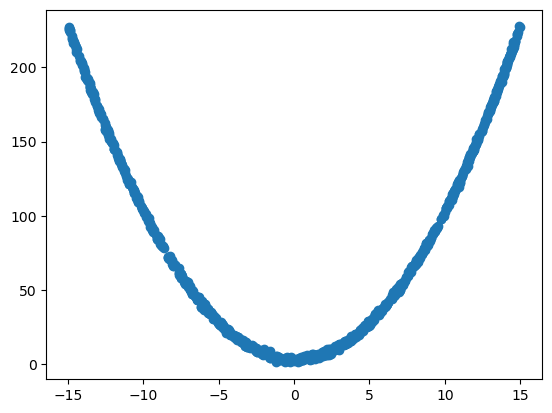

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1), std=1)
x = init.uniform_(torch.Tensor(num_data,1), -15,15)
y = (x**2)+3
y_noise = y + noise

plt.scatter(x, y_noise)
plt.show()

## MLP with activation function

![](./image/week1_MLP.png)

In [31]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

loss_array=[]
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output,y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss.item())

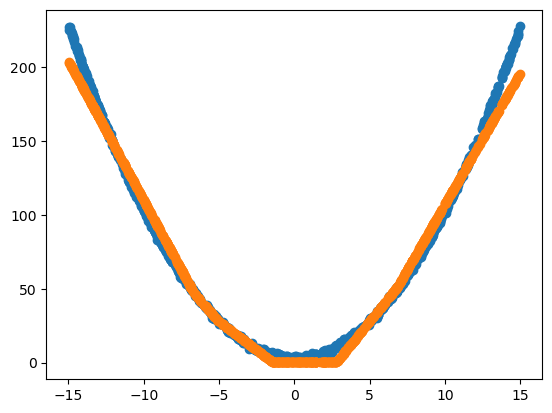

In [41]:
with torch.no_grad():
  plt.scatter(x, y_noise)
  plt.scatter(x, model(x))
plt.show()

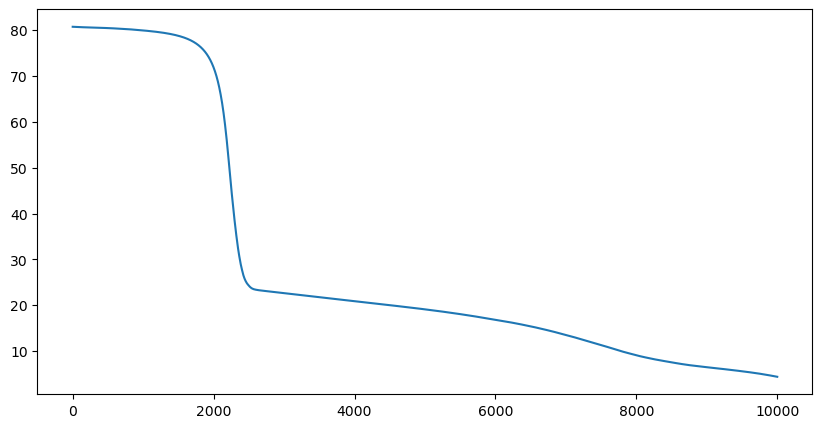

In [34]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(loss_array)

## MLP without activation function

In [35]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.Linear(6,10),
    nn.Linear(10,6),
    nn.Linear(6,1)
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

loss_array=[]
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output,y_noise)
  loss.backward()
  optimizer.step()
  loss_array.append(loss.item())

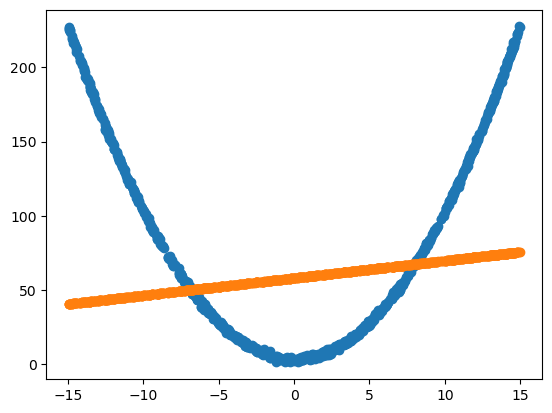

In [36]:
with torch.no_grad():
  plt.scatter(x, y_noise)
  plt.scatter(x, model(x))
plt.show()

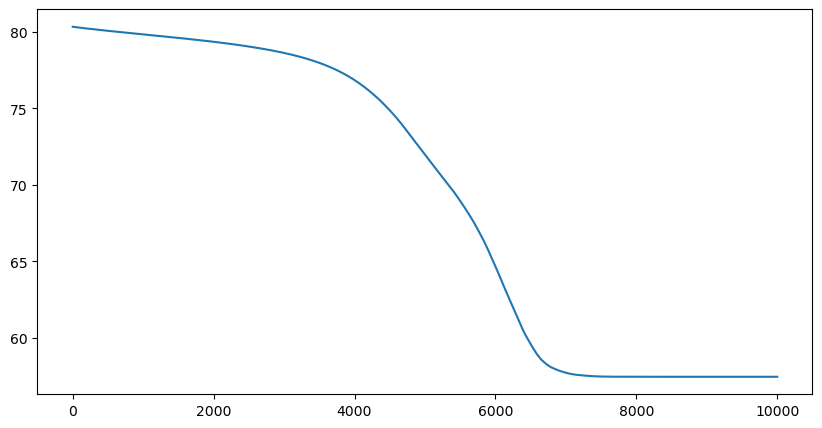

In [37]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(loss_array)

# Pytorch

### Load Dataset

In [39]:
data = pd.read_csv('./data/smoking.csv')

In [40]:
data.head(3)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [42]:
object_col = []
for i, col in enumerate(data.columns):
    if data[col].dtype == 'object':
        print(col)
        object_col.append(col)

gender
oral
tartar


In [43]:
numeric_data = data.drop(object_col + ['ID'], axis = 1, inplace = False).copy()

In [83]:
numeric_data

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,...,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,0
55688,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,...,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0
55689,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,...,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0
55690,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,...,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0


In [45]:
X = numeric_data.drop('smoking', axis = 1, inplace = False).copy()
Y = numeric_data['smoking'].copy()

In [46]:
print(X.shape)
print(Y.shape)

(55692, 22)
(55692,)


In [47]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.4, shuffle = True, random_state = 3132)

In [48]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(33415, 22)
(33415,)
(22277, 22)
(22277,)


In [49]:
train_X.head(3)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
46581,40,150,80,98.0,0.7,0.8,1.0,1.0,106.0,77.0,...,346.0,43.0,50.0,13.7,1.0,0.8,20.0,22.0,31.0,0
32200,75,160,65,86.0,0.6,0.8,1.0,1.0,121.0,69.0,...,141.0,51.0,81.0,13.6,1.0,0.7,16.0,12.0,19.0,0
45021,55,170,65,81.0,1.0,0.9,1.0,1.0,127.0,76.0,...,236.0,44.0,68.0,15.1,1.0,0.9,28.0,23.0,41.0,0


In [50]:
train_Y

46581    1
32200    0
45021    0
8048     1
41832    1
        ..
410      0
33109    0
29947    0
33632    0
36883    0
Name: smoking, Length: 33415, dtype: int64

## Scaling Data

In [51]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(train_X)
train_X = mms.transform(train_X)
test_X = mms.transform(test_X)

In [53]:
type(train_X)

numpy.ndarray

In [60]:
type(train_Y)

numpy.ndarray

In [59]:
train_Y = train_Y.values
test_Y = test_Y.values

type(train_Y)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

### Torch Dataset setting

In [61]:
import torch
from torch.utils.data import DataLoader, Dataset

class TensorData(Dataset):
    def __init__(self, x_data, y_data):
        # numpy array 형태의 데이터를 torch Tensor 형태로 변환
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index] 

    def __len__(self):
        return self.len

In [62]:
trainsets = TensorData(train_X, train_Y)
trainloader = DataLoader(trainsets, batch_size=2048, shuffle=True)

testsets = TensorData(test_X, test_Y)
testloader = DataLoader(testsets, batch_size=2048, shuffle=False)

In [63]:
for x, y in trainloader:
    print(x, x.shape)
    print(y, y.shape)
    break

tensor([[0.3846, 0.7500, 0.2857,  ..., 0.0048, 0.0140, 0.0000],
        [0.3077, 0.5833, 0.2381,  ..., 0.0048, 0.0090, 1.0000],
        [0.3846, 0.6667, 0.3333,  ..., 0.0158, 0.0311, 0.0000],
        ...,
        [0.5385, 0.4167, 0.2381,  ..., 0.0072, 0.0431, 0.0000],
        [0.1538, 0.5833, 0.3810,  ..., 0.0120, 0.0321, 0.0000],
        [0.0769, 0.7500, 0.3810,  ..., 0.0113, 0.0491, 0.0000]]) torch.Size([2048, 22])
tensor([0., 0., 1.,  ..., 1., 1., 1.]) torch.Size([2048])


## Train Setting

In [64]:
# GPU사용가능여부 확인
if torch.cuda.is_available():
    DEVICE = 'cuda'
else:
    DEVICE = 'cpu'
print(DEVICE)

cpu


In [65]:
import random
import torch
import os

# seed 고정함수 정의
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [100]:
pip install torchmetrics

     -------------------------------------- 761.3/761.3 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [103]:
from torchmetrics.classification import BinaryF1Score
from torchmetrics.classification import BinaryAccuracy

def evaluation(dataloader):
  predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서.
  actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서.
  
  with torch.no_grad():
    model.eval() # 평가를 할 땐 반드시 eval()을 사용해야 한다.

    for data in dataloader:
      inputs, values = data[0], data[1]
      
      outputs = model(inputs.to(DEVICE))
      
      predictions = torch.cat((predictions, outputs.cpu()), 0) # cat함수를 통해 예측값을 누적.
      actual = torch.cat((actual, values), 0) # cat함수를 통해 실제값을 누적.
  
  predictions = predictions.reshape(-1, )
  
  metric_f1 = BinaryF1Score(threshold = 0.5)
  f1 = metric_f1(predictions, actual).numpy()
  metric_acc = BinaryAccuracy()
  acc = metric_acc(predictions, actual).numpy()
  
  model.train() # 다시 학습할 수 있는 상태로 전환

  return acc, f1

#### Define Model

In [75]:
from torch import nn
from torch import optim
# 모델 구조 정의
class MLP_Classifier(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.fc1 = nn.Linear(num_features, 128) 
        self.fc2 = nn.Linear(128, 64) 
        self.fc3 = nn.Linear(64, 32) 
        self.fc4 = nn.Linear(32, 16) 
        self.fc5 = nn.Linear(16, 8)
        self.fc6 = nn.Linear(8, 1)
        
         
        self.dropout = nn.Dropout(0.2)
        # self.softplus = nn.Softplus()

    def forward(self, x): 
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        # x = self.dropout(torch.relu(self.fc3(x)))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.sigmoid(self.fc6(x))
      
        return x

In [82]:
model = MLP_Classifier(num_features = train_X.shape[1])

model.load_state_dict(torch.load('./model/MLP_classifier_2/EPOCH_333.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [80]:
perceptron.load_state_dict(torch.load('./model/MLP_classifier_2/EPOCH_333.pt', map_location=torch.device('cpu')))

RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.weight", "0.bias". 
	Unexpected key(s) in state_dict: "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias", "fc3.weight", "fc3.bias", "fc4.weight", "fc4.bias", "fc5.weight", "fc5.bias", "fc6.weight", "fc6.bias". 

In [79]:
model(x)

tensor([[0.6856],
        [0.0434],
        [0.6944],
        ...,
        [0.0635],
        [0.5127],
        [0.6126]], grad_fn=<SigmoidBackward0>)

In [67]:
import os

experiment_name = 'MLP_classifier_4' # 실험명 지정
os.makedirs('./model/{0}'.format(experiment_name)) # 해당 이름으로 학습 기록용 폴더 생성

In [104]:
seed = 32
seed_everything(seed)

model = MLP_Classifier(num_features = train_X.shape[1]) # 모델 할당
model.to(DEVICE) # gpu/cpu에 모델 올리기
criterion = nn.BCELoss().to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [108]:
# EARLY STOPPING PARAMETERS
best_loss = 10 ** 9 # 매우 큰 값으로 초기값 가정
patience_limit = 10000 # 몇 번의 epoch까지 지켜볼지를 결정
patience_check = 0 # 현재 몇 epoch 연속으로 loss 개선이 안되는지를 기록

loss_history_train = []
loss_history_test = []
acc_history_train = []
acc_history_test = []
f1_history_train = []
f1_history_test = []
n = len(trainloader) # batch size

for epoch in range(10000):
  # train set
  loss_train = 0.0 
  model.train()
  
  for i, data in enumerate(trainloader, 0):
    inputs, values = data[0].to(DEVICE), data[1].to(DEVICE) # data에는 X, Y가 들어있다.

    optimizer.zero_grad() # 최적화 초기화.

    outputs = model(inputs) # 모델에 입력값을 넣어 예측값을 산출한다.
    loss = criterion(outputs.reshape(-1, ), values) # 손실함수를 계산. error 계산.
    
    loss.backward() # 손실 함수를 기준으로 역전파를 설정한다.
    optimizer.step() # 역전파를 진행하고 가중치를 업데이트한다.

    loss_train += loss.item() # epoch 마다 평균 loss를 계산하기 위해 배치 loss를 더한다.
  
  loss_history_train.append(loss_train/n)
  acc_train, f1_train = evaluation(trainloader)
  acc_history_train.append(acc_train)
  f1_history_train.append(f1_train)

  
  # test set
  loss_test = 0.0
  model.eval()
  with torch.no_grad():
    for i, data in enumerate(testloader, 0):
      
      inputs, values = data[0].to(DEVICE), data[1].to(DEVICE) # data에는 X, Y가 들어있다.

      outputs = model(inputs) # 모델에 입력값을 넣어 예측값을 산출한다.
      loss = criterion(outputs.reshape(-1, ), values) # 손실함수를 계산. error 계산.
    
      loss_test += loss.item() 
    
  loss_history_test.append(loss_test/n)

  acc_test, f1_test = evaluation(testloader)

  acc_history_test.append(acc_test)
  f1_history_test.append(f1_test)
  
  # print out evaluations
  # 10 Epoch마다 성능 출력
  if epoch % 10 == 0:
    template = '{0} Loss: {1:.3f}\t{0} Acc: {2:.3f}\t{0} F1: {3:.3f}'
    print('-----Epoch: {0}'.format(epoch))
    print(template.format('Train',
                          loss_train/n,
                          acc_train,
                          f1_train))
    print(template.format('test',
                          loss_test/n,
                          acc_test,
                          f1_test))
    
  # 모델 저장
  torch.save(model.state_dict(),
             './model/{0}/EPOCH_{1}.pt'.format(experiment_name, epoch))

  # EARLY STOPPING
  if loss_test > best_loss: # loss가 개선되지 않은 경우
      patience_check += 1

      if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
          print('EARLY STOPPED AT EPOCH--' + str(epoch))
          break

  else: # loss가 개선된 경우
      best_loss = loss_test
      patience_check = 0
  
# 학습 기록을 저장하여 추후 필요한 모델 불러오기
np.save('./model/{0}/loss_history_train.npy'.format(experiment_name), np.array(loss_history_train))
np.save('./model/{0}/loss_history_test.npy'.format(experiment_name), np.array(loss_history_test))
np.save('./model/{0}/acc_history_train.npy'.format(experiment_name), np.array(acc_history_train))
np.save('./model/{0}/acc_history_test.npy'.format(experiment_name), np.array(acc_history_test))
np.save('./model/{0}/f1_history_train.npy'.format(experiment_name), np.array(f1_history_train))
np.save('./model/{0}/f1_history_test.npy'.format(experiment_name), np.array(f1_history_test))

-----Epoch: 0
Train Loss: 0.709	Train Acc: 0.369	Train F1: 0.539
test Loss: 0.470	test Acc: 0.365	test F1: 0.535
-----Epoch: 10
Train Loss: 0.545	Train Acc: 0.705	Train F1: 0.591
test Loss: 0.360	test Acc: 0.702	test F1: 0.588
-----Epoch: 20
Train Loss: 0.504	Train Acc: 0.726	Train F1: 0.626
test Loss: 0.337	test Acc: 0.722	test F1: 0.620
-----Epoch: 30
Train Loss: 0.496	Train Acc: 0.732	Train F1: 0.656
test Loss: 0.333	test Acc: 0.730	test F1: 0.653
-----Epoch: 40
Train Loss: 0.491	Train Acc: 0.733	Train F1: 0.627
test Loss: 0.331	test Acc: 0.732	test F1: 0.623
-----Epoch: 50
Train Loss: 0.489	Train Acc: 0.737	Train F1: 0.638
test Loss: 0.330	test Acc: 0.733	test F1: 0.632
-----Epoch: 60
Train Loss: 0.489	Train Acc: 0.738	Train F1: 0.650
test Loss: 0.329	test Acc: 0.735	test F1: 0.647
-----Epoch: 70
Train Loss: 0.488	Train Acc: 0.738	Train F1: 0.653
test Loss: 0.329	test Acc: 0.735	test F1: 0.648
-----Epoch: 80
Train Loss: 0.486	Train Acc: 0.739	Train F1: 0.651
test Loss: 0.328	test A

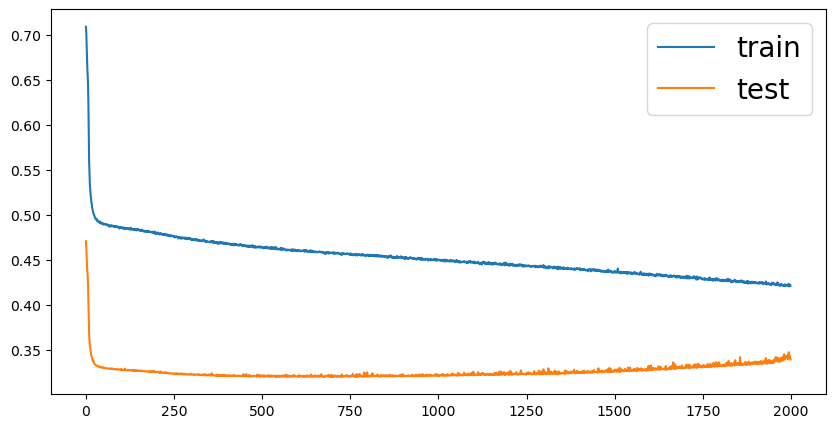

In [109]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(loss_history_train[:2000], label = 'train')
ax.plot(loss_history_test[:2000], label = 'test')
ax.legend(fontsize = 20)

In [69]:
loss_history_train_2 = np.load('./model/MLP_classifier_2/loss_history_train.npy')
acc_history_train_2 = np.load('./model/MLP_classifier_2/acc_history_train.npy')
f1_history_train_2 = np.load('./model/MLP_classifier_2/f1_history_train.npy')
loss_history_test_2 = np.load('./model/MLP_classifier_2/loss_history_test.npy')
acc_history_test_2 = np.load('./model/MLP_classifier_2/acc_history_test.npy')
f1_history_test_2 = np.load('./model/MLP_classifier_2/f1_history_test.npy')

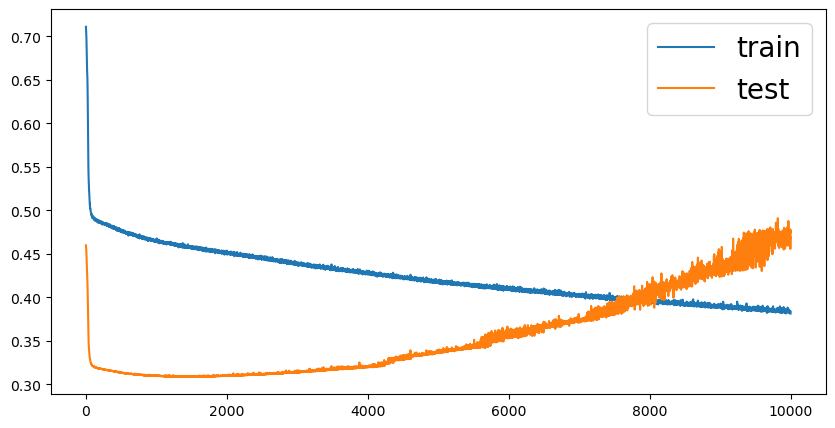

In [70]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(loss_history_train_2, label = 'train')
ax.plot(loss_history_test_2, label = 'test')
ax.legend(fontsize = 20)


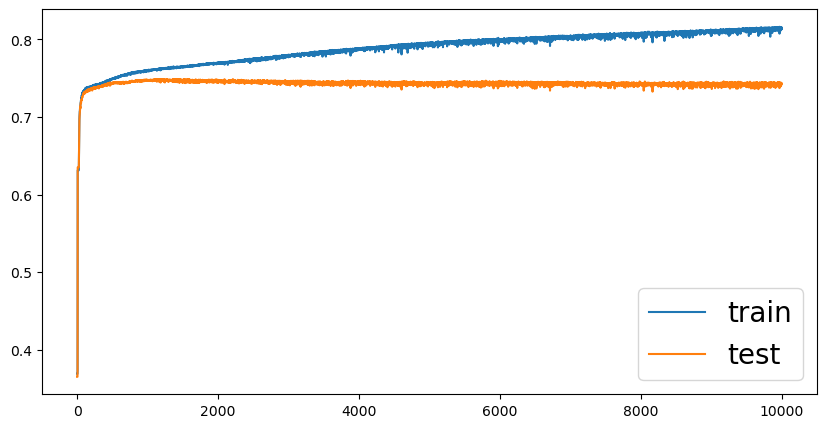

In [71]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(acc_history_train_2, label = 'train')
ax.plot(acc_history_test_2, label = 'test')
ax.legend(fontsize = 20)

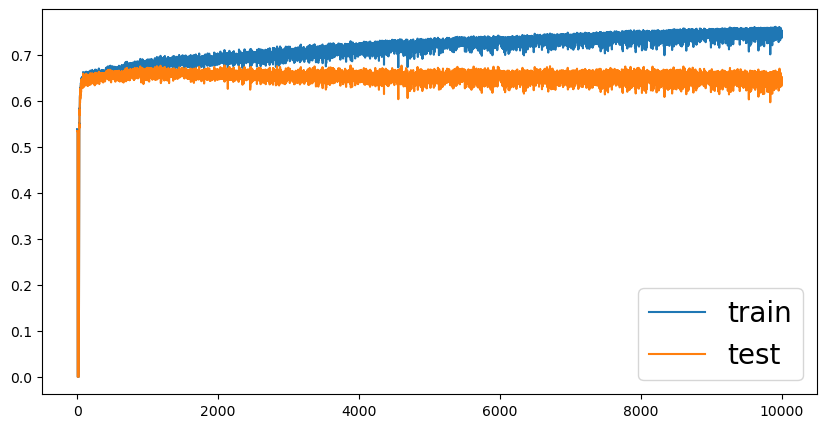

In [72]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(f1_history_train_2, label = 'train')
ax.plot(f1_history_test_2, label = 'test')
ax.legend(fontsize = 20)